# Läs in kommundata

In [1]:
from random import randint
from data_parsing import DataParser


data = DataParser()
data.laddaKommuner()
print("Slumpmässig kommun: ")
print(data.kommuner[randint(0, 289)])

Slumpmässig kommun: 
Kommunen Sala har id 1981 och har som senast totalt 21997 människor som bodde i kommunen. Snittåldern är 46 år, samt hade år 2017 en befolkningstäthet på: 19 människor/km^2


# Läs in bankomatdata

In [2]:
data.laddaBankomater()

print("Slumpmässig bankomat: ")
print(data.bankomater[randint(0, len(data.bankomater) -1 )])
print("Slumpmässig transaktion")
print(data.bankomater[randint(0, len(data.bankomater) - 1)].transaktionsDataSEK[0])

Slumpmässig bankomat: 
Bankomat med id 612554, som finns på addressen Storgatan 49, i Umeå kommun. Det finns 58 transaktionsadata registrerade. ÄrUte = False
Slumpmässig transaktion
{'månad': '2017M07', 'antalTransaktioner': 241, 'omsättning': 185100}


# Deskriptiv Analys

* Testar slumpmässig bankomat för brainstorming

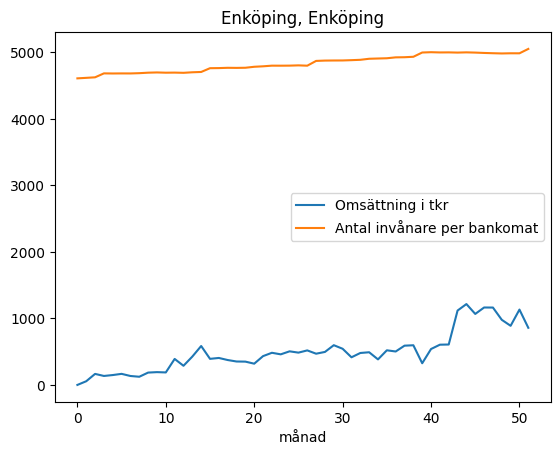

In [3]:
from analysis_models import AnalysModeller


analyser = AnalysModeller(data)

analyser.slumpmässigBankomatOmsättning()

* Testar samband mellan omsättning och befolkningstäthet

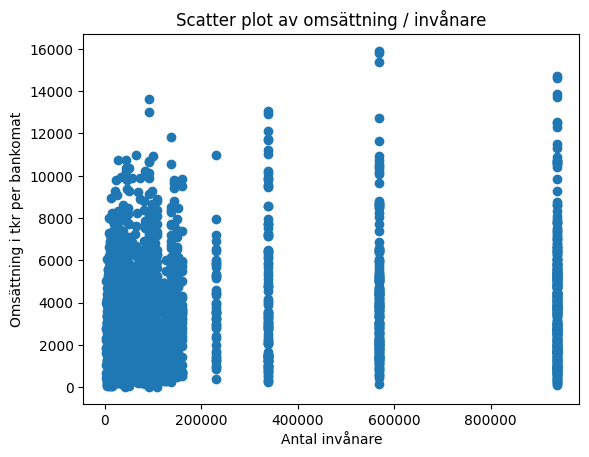

In [4]:
analyser.scatterPlotOmsättningPerInvånare()

# Ser att detta ger oss väldigt lite information. 
* Pelarna är de olika storstäderna, och där är automaterna väldigt spridda. 
* Kan vara relevant att istället kolla på omsättningen per invånare per bankomat

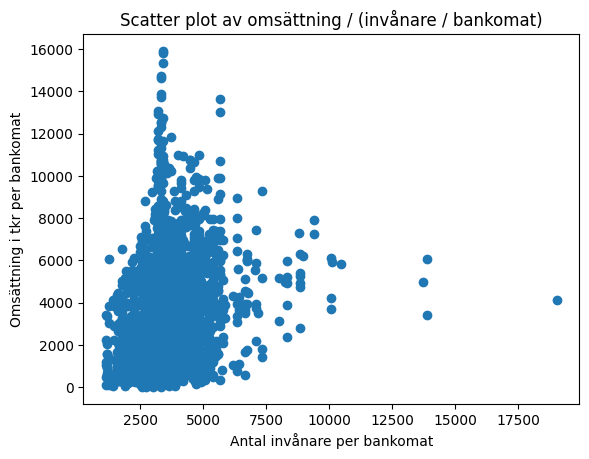

In [5]:
analyser.scatterPlotOmsättningPerInvånarePerBankomat()

# Detta ger lite mer information
* Vi ser att det inte finns ett kontinuerligt samband mellan befolkning per automat och omsättning
* När det finns för få invånare per bankomat finns det relativt liten omsättning
* När det finns för många invånare per bankomat finns det relativt liten omsättning (Vad kan det bero på?)
* I området mellan 2500 - 6000 invånare per bankomat ser vi att det finns som störst omsättning (Varför det?)

Vallentuna 0 97.4
Huddinge 0 875.0
Botkyrka 0 491.6
Salem 0 320.7
Haninge 0 214.5
Upplands-Bro 0 135.4
Nykvarn 0 76.4
Danderyd 0 1239.7
Sollentuna 0 1449.1
Stockholm 0 5260.1
Nacka 0 1155.2
Sundbyberg 0 6229.3
Solna 0 4434.4
Vaxholm 0 206.5
Sigtuna 0 158.3
Knivsta 0 71.4
Heby 0 12.4
Tierp 0 13.9
Uppsala 0 111.0
Gnesta 0 25.2
Flen 0 22.4
Katrineholm 0 33.9
Eskilstuna 0 98.1
Trosa 0 70.6
Ydre 0 5.5
Kinda 0 8.9
Boxholm 0 10.5
Valdemarsvik 0 10.4
Motala 0 44.5
Vadstena 0 39.0
Aneby 0 13.2
Habo 0 40.0
Gislaved 0 25.9
Vaggeryd 0 18.0
Vetlanda 0 18.4
Uppvidinge 0 8.0
Lessebo 0 20.6
Tingsryd 0 11.8
Alvesta 0 20.8
Markaryd 0 19.7
Ljungby 0 16.3
Hultsfred 0 12.5
Emmaboda 0 13.6
Kalmar 0 75.3
Nybro 0 17.3
Oskarshamn 0 25.8
Vimmerby 0 13.6
Borgholm 0 16.0
Gotland 0 19.5
Karlskrona 0 64.0
Ronneby 0 35.3
Karlshamn 0 65.9
Staffanstorp 0 250.7
Vellinge 0 265.1
Bjuv 0 139.3
Lomma 0 445.5
Svedala 0 107.0
Skurup 0 86.5
Tomelilla 0 34.9
Osby 0 23.0
Perstorp 0 46.8
Klippan 0 47.7
Lund 0 300.8
Landskrona 0 

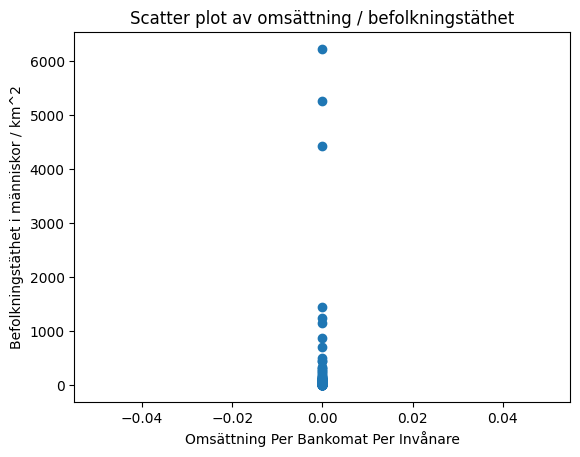

In [6]:
analyser.scatterPlotOmsättningPerInvånareMotBefolkningstäthet()